In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
zip_path = '/content/drive/MyDrive/Datasets/New Plant Diseases Dataset(Augmented).zip'

"""
Copying the .zip file of dataset from google drive to my colab notebook for faster Access
"""
print(" Copying dataset to Colab runtime...")
!cp "{zip_path}" /content/

print(" Unzipping dataset...")
!unzip -o -q "/content/New Plant Diseases Dataset(Augmented).zip" -d /content/
print(" Dataset is ready on the local disk!")


train_path = '/content/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/valid'

# Converting Training data to a tensorflow dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="int",
    image_size=(224, 224),
    batch_size=32
)

# Converting Validation data to a tensorflow dataset
valid_ds = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="int",
    image_size=(224, 224),
    batch_size=32
)

➡️ Copying dataset to Colab runtime...
➡️ Unzipping dataset...
✅ Dataset is ready on the local disk!
Found 18345 files belonging to 10 classes.
Found 4585 files belonging to 10 classes.


In [ ]:
# Dataset Info
class_names = train_ds.class_names
print("="*50)
print(f"Total Classes: {len(class_names)}")
print("Classes:", ", ".join(class_names))
print("="*50)

train_batches = tf.data.experimental.cardinality(train_ds).numpy()
valid_batches = tf.data.experimental.cardinality(valid_ds).numpy()
print(f"Train Batches: {train_batches}")
print(f"Validation Batches: {valid_batches}")
print("="*50)

def count_images_in_folders(path, class_names):
    counts = []
    for cls in class_names:
        counts.append(len(os.listdir(os.path.join(path, cls))))
    return counts

train_counts = count_images_in_folders(train_path, class_names)
valid_counts = count_images_in_folders(valid_path, class_names)
print("Class-wise Image Count".center(80, "-"))
print(f"{'Class':50} | {'Train':6} | {'Validation':10}")
print("-"*80)
for cls, tr, vl in zip(class_names, train_counts, valid_counts):
    print(f"{cls:50} | {tr:6} | {vl:10}")
print("-"*80)

Total Classes: 10
Classes: Tomato___Bacterial_spot, Tomato___Early_blight, Tomato___Late_blight, Tomato___Leaf_Mold, Tomato___Septoria_leaf_spot, Tomato___Spider_mites Two-spotted_spider_mite, Tomato___Target_Spot, Tomato___Tomato_Yellow_Leaf_Curl_Virus, Tomato___Tomato_mosaic_virus, Tomato___healthy
Train Batches: 574
Validation Batches: 144
-----------------------------Class-wise Image Count-----------------------------
Class                                              | Train  | Validation
--------------------------------------------------------------------------------
Tomato___Bacterial_spot                            |   1702 |        425
Tomato___Early_blight                              |   1920 |        480
Tomato___Late_blight                               |   1851 |        463
Tomato___Leaf_Mold                                 |   1882 |        470
Tomato___Septoria_leaf_spot                        |   1745 |        436
Tomato___Spider_mites Two-spotted_spider_mite      |   

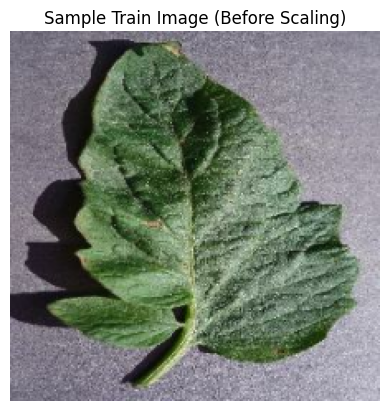


Pixel values (Red channel, Before Scaling):
102 120 121 120 131 125 106 107 129 113 108 111 119 125 104 114 111 126 119 116 
118 120 131 133 128 127 123 96 111 106 110 114 121 113 106 98 93 100 98 104 
110 118 121 117 116 117 115 103 109 116 123 123 129 111 107 104 104 103 106 98 
110 127 118 110 119 120 109 107 108 119 124 117 125 109 115 114 121 105 109 109 
117 116 114 112 114 112 103 112 112 119 124 115 123 118 107 119 118 103 111 111 
121 116 121 121 115 111 105 111 109 105 115 107 108 113 105 116 117 118 113 110 
107 128 124 113 115 111 98 122 117 103 117 112 104 109 126 127 103 118 107 102 
123 106 117 127 120 112 108 121 110 105 107 107 106 109 116 101 110 114 119 104 
110 111 126 130 122 123 126 116 110 110 116 118 119 121 116 122 119 114 119 110 
124 120 124 124 123 119 102 122 118 118 121 122 124 127 115 114 117 133 125 119 
115 118 122 119 121 123 108 116 118 120 119 116 115 115 111 112 105 119 117 126 
112 116 121 115 115 122 114 111 115 114 110 110 118 123 106 112 110 11

In [ ]:
# sample image
for images, lables in train_ds.take(1):
    sample_img = images[0].numpy().astype("uint8")

plt.title("Sample Train Image (Before Scaling)")
plt.imshow(sample_img)
plt.axis("off")
plt.show()

print("\nPixel values (Red channel, Before Scaling):")
for row in sample_img[:, :, 0]:
    for pixel in row[:20]:
        print(pixel, end=" ")
    print()



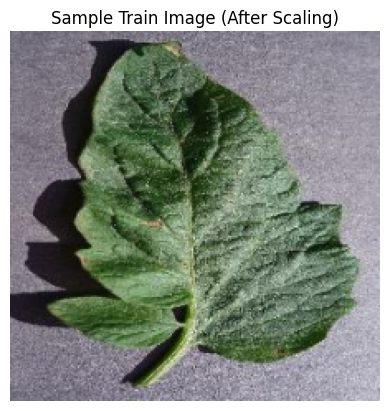


Pixel values (Red channel, After Scaling):
0.40 0.47 0.47 0.47 0.51 0.49 0.42 0.42 0.51 0.44 0.42 0.44 0.47 0.49 0.41 0.45 0.44 0.49 0.47 0.45 
0.46 0.47 0.51 0.52 0.50 0.50 0.48 0.38 0.44 0.42 0.43 0.45 0.47 0.44 0.42 0.38 0.36 0.39 0.38 0.41 
0.43 0.46 0.47 0.46 0.45 0.46 0.45 0.40 0.43 0.45 0.48 0.48 0.51 0.44 0.42 0.41 0.41 0.40 0.42 0.38 
0.43 0.50 0.46 0.43 0.47 0.47 0.43 0.42 0.42 0.47 0.49 0.46 0.49 0.43 0.45 0.45 0.47 0.41 0.43 0.43 
0.46 0.45 0.45 0.44 0.45 0.44 0.40 0.44 0.44 0.47 0.49 0.45 0.48 0.46 0.42 0.47 0.46 0.40 0.44 0.44 
0.47 0.45 0.47 0.47 0.45 0.44 0.41 0.44 0.43 0.41 0.45 0.42 0.42 0.44 0.41 0.45 0.46 0.46 0.44 0.43 
0.42 0.50 0.49 0.44 0.45 0.44 0.38 0.48 0.46 0.40 0.46 0.44 0.41 0.43 0.49 0.50 0.40 0.46 0.42 0.40 
0.48 0.42 0.46 0.50 0.47 0.44 0.42 0.47 0.43 0.41 0.42 0.42 0.42 0.43 0.45 0.40 0.43 0.45 0.47 0.41 
0.43 0.44 0.49 0.51 0.48 0.48 0.49 0.45 0.43 0.43 0.45 0.46 0.47 0.47 0.45 0.48 0.47 0.45 0.47 0.43 
0.49 0.47 0.49 0.49 0.48 0.47 0.40 0.48 0.46 0.

In [ ]:
# Scaling dataset
scaled_train_ds = train_ds.map(lambda x, y: (x/255.0, y))
scaled_valid_ds = valid_ds.map(lambda x, y: (x/255.0, y))


sample_img_scaled = sample_img / 255.0

plt.title("Sample Train Image (After Scaling)")
plt.imshow(sample_img_scaled)
plt.axis("off")
plt.show()

print("\nPixel values (Red channel, After Scaling):")
for row in sample_img_scaled[:, :, 0]:
    for pixel in row[:20]:
        print("{:.2f}".format(pixel), end=" ")
    print()

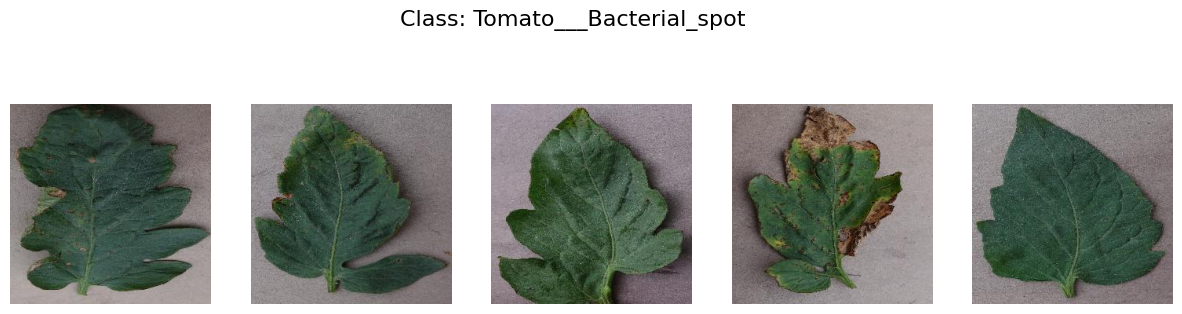

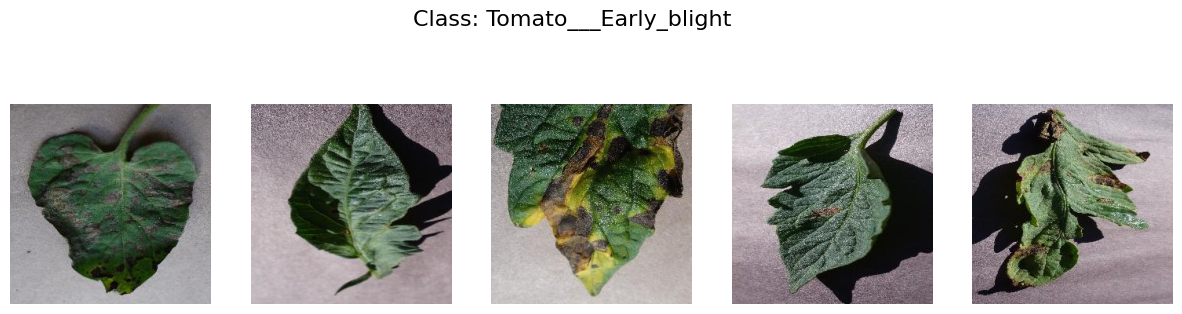

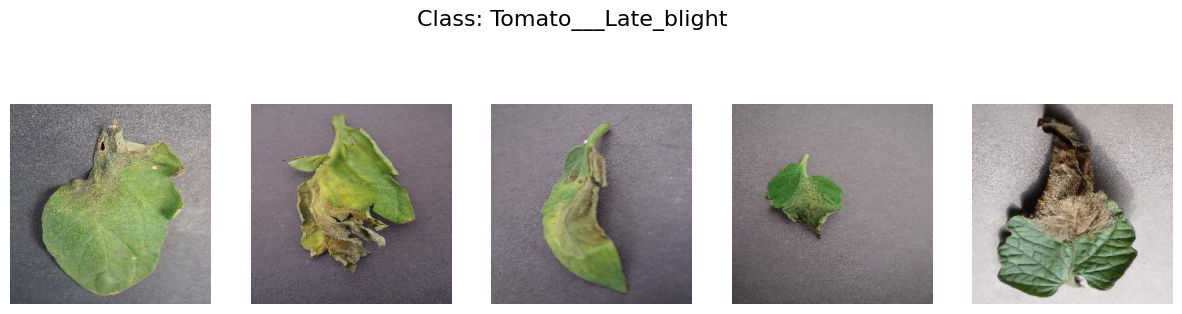

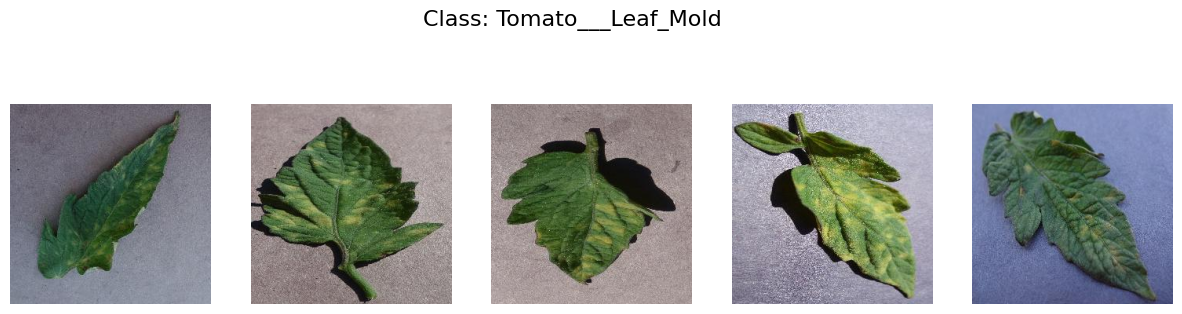

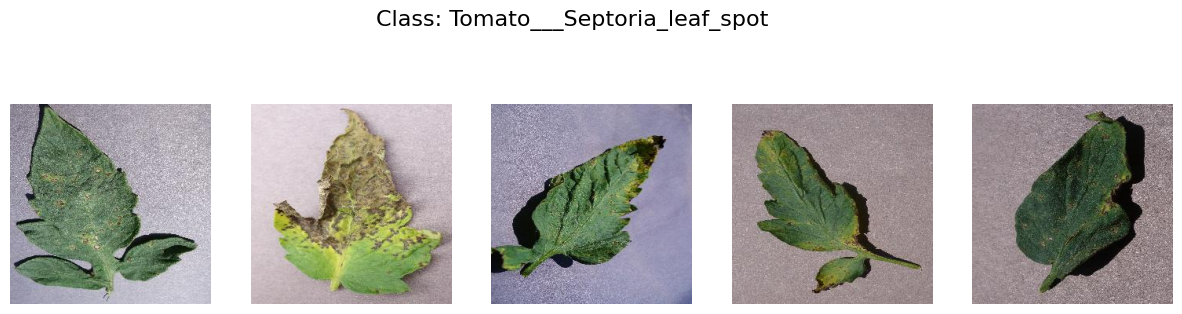

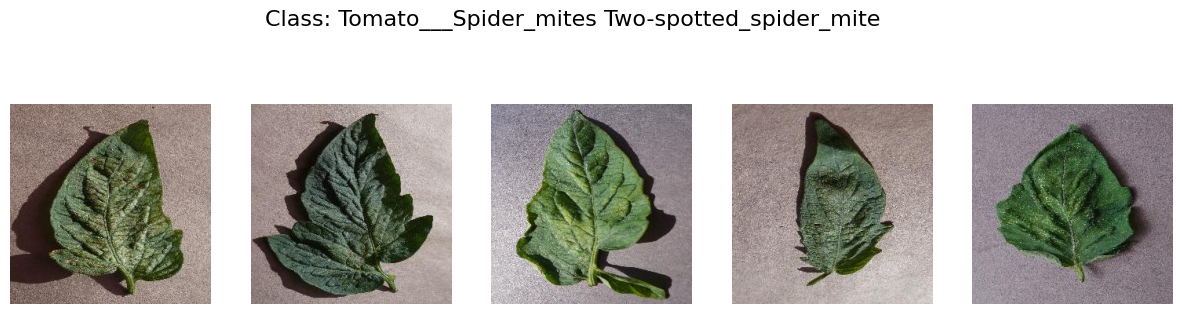

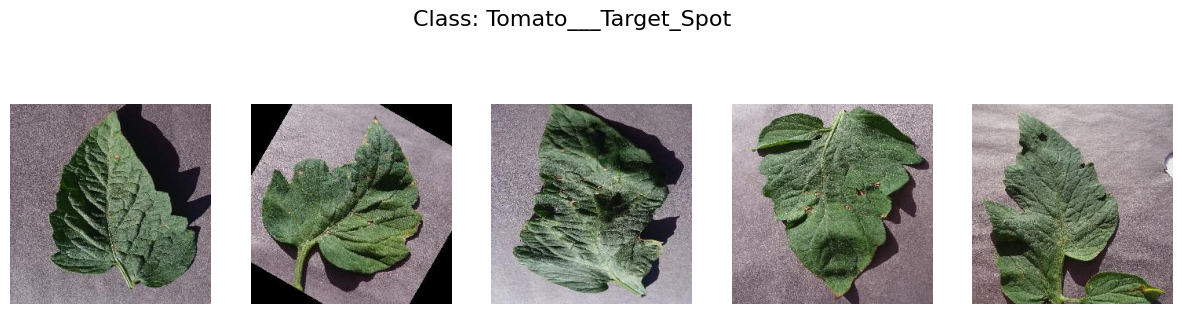

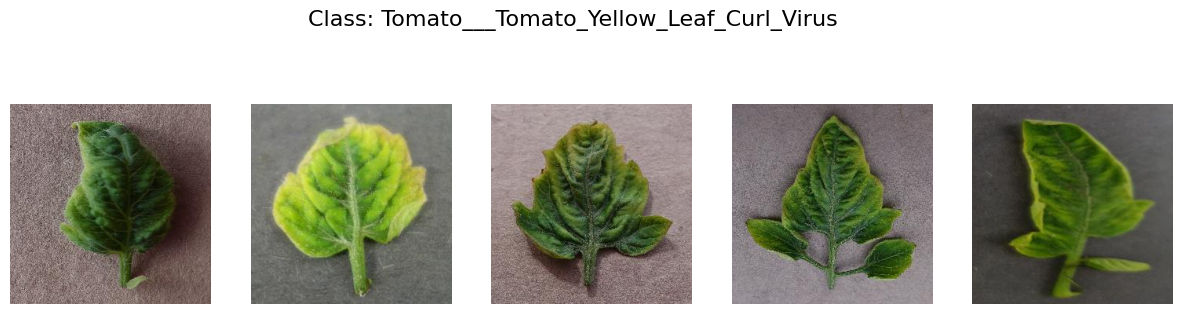

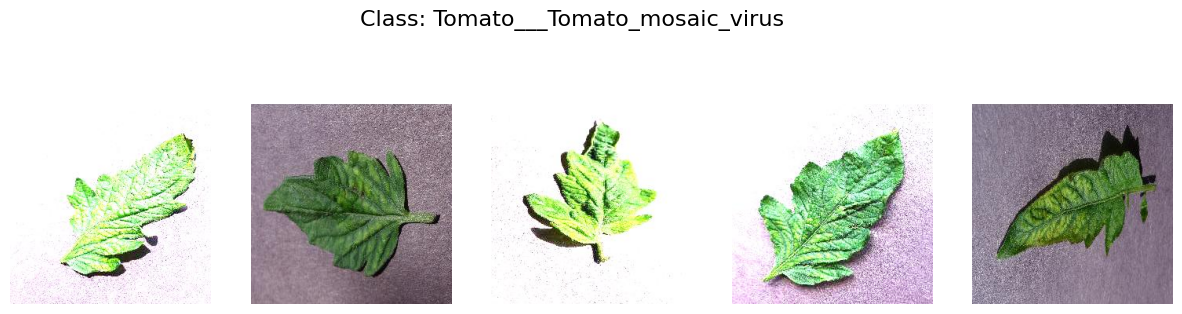

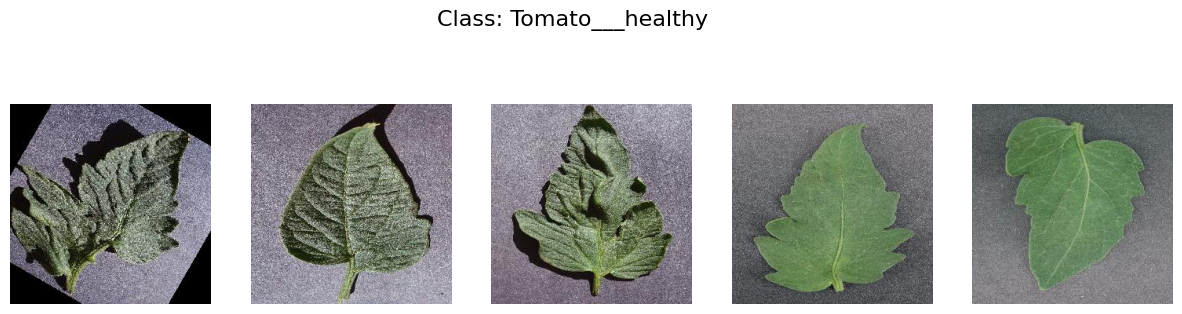

In [ ]:
from pathlib import Path
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


dataset_path = Path(train_path)

class_paths = [path for path in dataset_path.iterdir() if path.is_dir()]

for class_path in sorted(class_paths):
    all_images = list(class_path.glob('*.JPG'))
    sample_images = random.sample(all_images, k=5)

    plt.figure(figsize=(15, 4))
    plt.suptitle(f"Class: {class_path.name}", fontsize=16)

    for i, img_path in enumerate(sample_images):
        ax = plt.subplot(1, 5, i + 1)
        image = mpimg.imread(img_path)
        plt.imshow(image)
        plt.axis("off")

    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Base Model MobileNetV2
base_model = keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

# freeze
base_model.trainable = False

# Head (classifier)
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation="softmax")
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Training
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1)

history1 = model.fit(
    scaled_train_ds,
    validation_data=scaled_valid_ds,
    epochs=50,
    callbacks=[early_stop, lr_reducer],
    verbose=1
)

# Fine-tuning stage
base_model.trainable = True
for layer in base_model.layers[:-40]:  # taking last 40 layers as trainable
    layer.trainable = False

# Re-compile with smaller learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model.fit(
    scaled_train_ds,
    validation_data=scaled_valid_ds,
    epochs=50,
    callbacks=[early_stop, lr_reducer],
    verbose=1
)

Epoch 1/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.3756 - loss: 2.0771 - val_accuracy: 0.7804 - val_loss: 0.7040 - learning_rate: 1.0000e-04
Epoch 2/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.7112 - loss: 0.8846 - val_accuracy: 0.8334 - val_loss: 0.5444 - learning_rate: 1.0000e-04
Epoch 3/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.7812 - loss: 0.6825 - val_accuracy: 0.8609 - val_loss: 0.4700 - learning_rate: 1.0000e-04
Epoch 4/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.8114 - loss: 0.5865 - val_accuracy: 0.8750 - val_loss: 0.4196 - learning_rate: 1.0000e-04
Epoch 5/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.8350 - loss: 0.5208 - val_accuracy: 0.8838 - val_loss: 0.3948 - learning_rate: 1.0000e-04
Epoch 6/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.8527 - loss: 0.4807 - val_accuracy: 0.8929 - val_loss: 0.3638 - learning_rate: 1.0000e-04
Epoch 7/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/ste

In [ ]:
acc = history1.history['accuracy'] + history2.history['accuracy']
val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
loss = history1.history['loss'] + history2.history['loss']
val_loss = history1.history['val_loss'] + history2.history['val_loss']

# final scores
print("="*60)
print("Model Training Summary")
print("="*60)
print(f"Total Epochs Trained: {len(acc)}")
print(f"Final Training Accuracy:   {acc[-1]*100:.2f}%")
print(f"Final Validation Accuracy: {val_acc[-1]*100:.2f}%")
print(f"Final Training Loss:       {loss[-1]:.4f}")
print(f"Final Validation Loss:     {val_loss[-1]:.4f}")
print("="*60)

Model Training Summary
Total Epochs Trained: 66
Final Training Accuracy:   99.85%
Final Validation Accuracy: 98.19%
Final Training Loss:       0.0281
Final Validation Loss:     0.0754


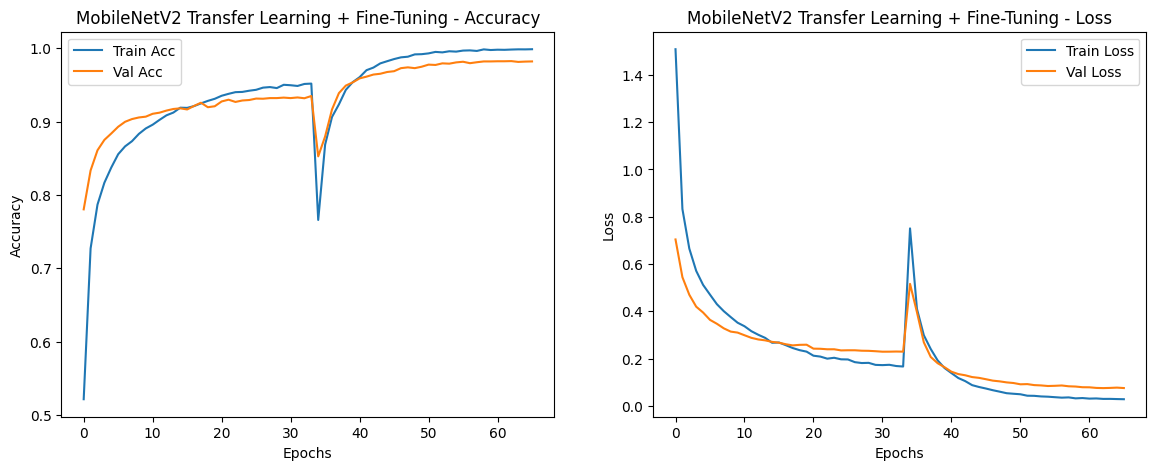

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.title("MobileNetV2 Transfer Learning + Fine-Tuning - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("MobileNetV2 Transfer Learning + Fine-Tuning - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


**<h1>MobileNet V2 Architecture</h1>**




In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

model_explain = MobileNetV2()
model_explain.summary()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


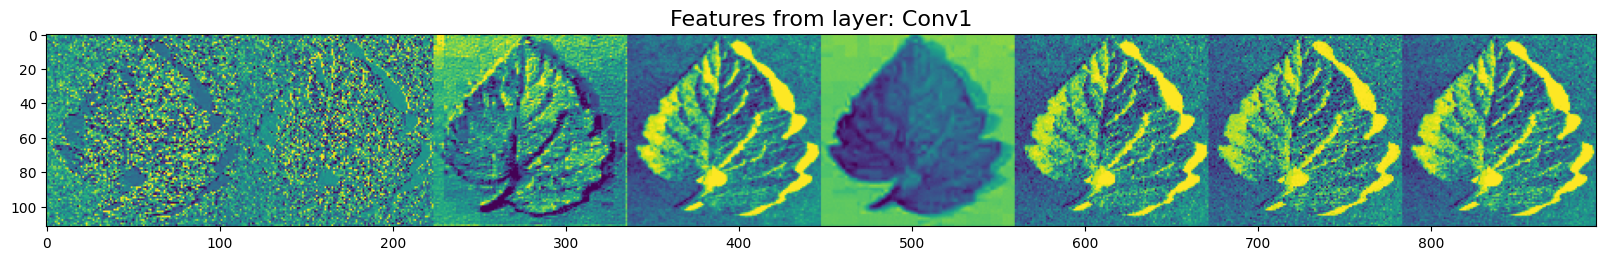

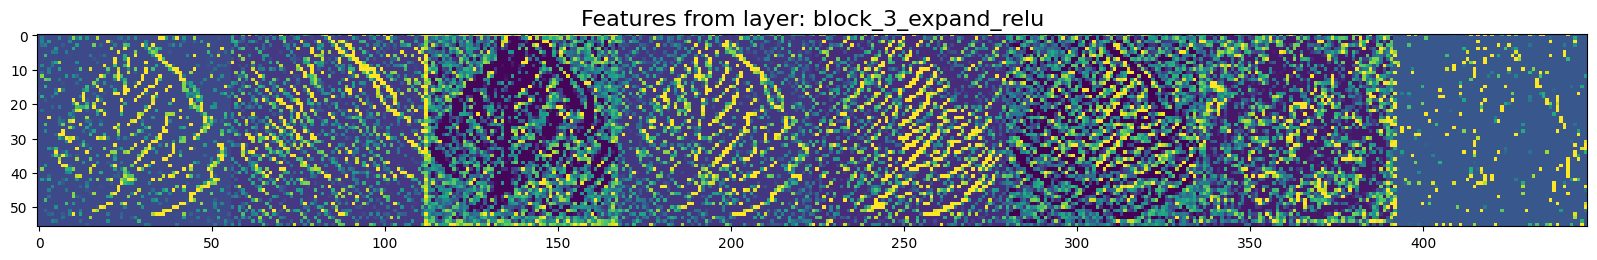

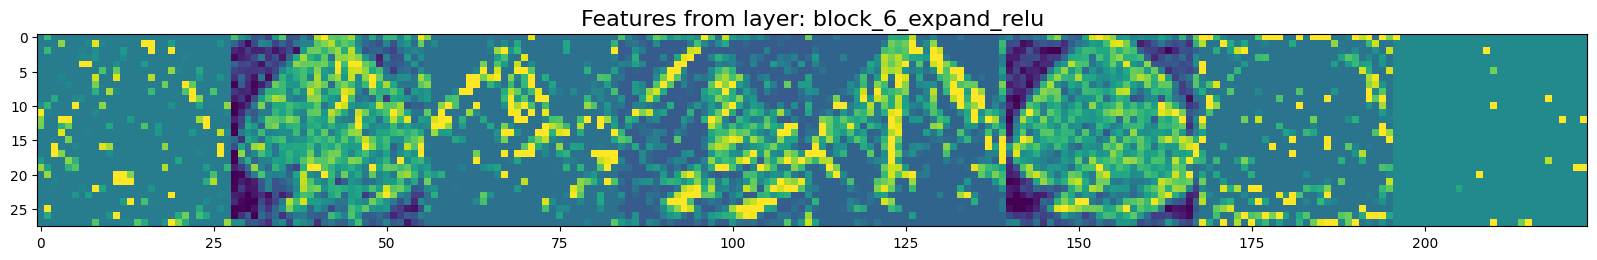

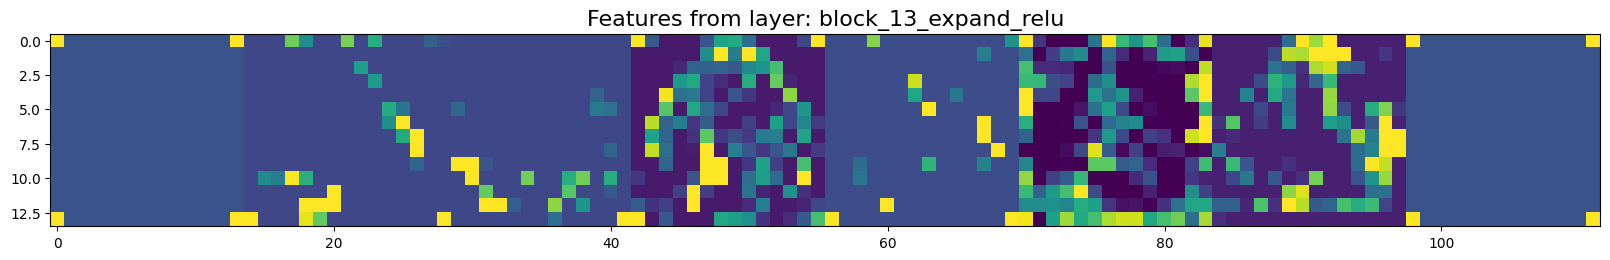

/tmp/ipython-input-916910462.py:47: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipython-input-916910462.py:50: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


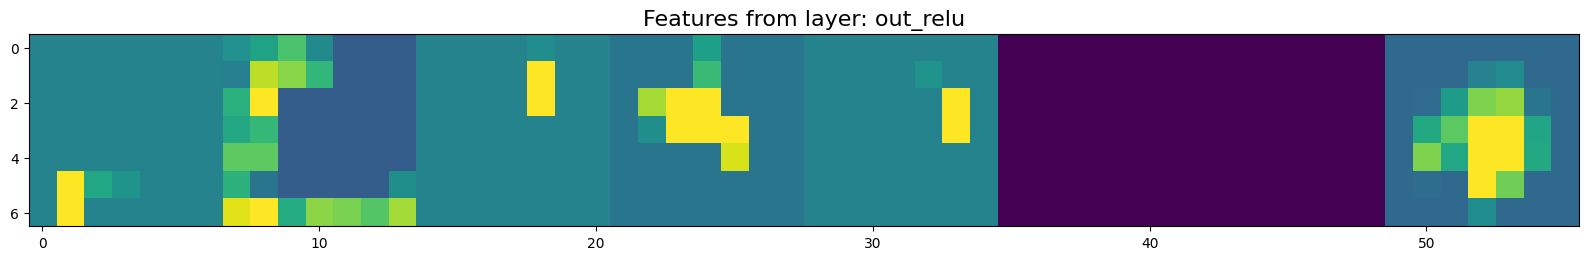

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

layer_names = [
    'Conv1',             # First layer: finds very simple edges/colors
    'block_3_expand_relu', # A layer from the early-middle part
    'block_6_expand_relu', # A layer from the middle part
    'block_13_expand_relu',# A layer from the late-middle part
    'out_relu'           # The very last layer before the output
]
layer_outputs = [base_model.get_layer(name).output for name in layer_names]

visualization_model = tf.keras.Model(inputs=base_model.input, outputs=layer_outputs)

image_path = '/content/drive/MyDrive/Datasets/leaf.JPG'

img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
# Add a "batch" dimension to the image array
img_array = np.expand_dims(img_array, axis=0)
# Preprocess the image exactly as MobileNetV2 expects
img_array = preprocess_input(img_array)

feature_maps = visualization_model.predict(img_array)

for layer_name, fmap in zip(layer_names, feature_maps):
    # We can only plot a few maps from each layer
    num_features = fmap.shape[-1]
    size = fmap.shape[1]
    display_grid = np.zeros((size, size * min(num_features, 8))) # Display up to 8 features

    for i in range(min(num_features, 8)):
        x = fmap[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / min(num_features, 8)
    plt.figure(figsize=(scale * min(num_features, 8), scale))
    plt.title(f'Features from layer: {layer_name}', fontsize=16)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()